# WaveletでスムージングしたLSWIを確認

In [13]:
from osgeo import gdal
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
from lib.GdalHandle import MultiImages
%matplotlib inline

In [8]:
ds = gdal.Open("../tif/MODIS.LSWI.2002200.h23v06.tif")
array = ds.ReadAsArray()
array[array == -999] = np.nan

24.0 -16.0


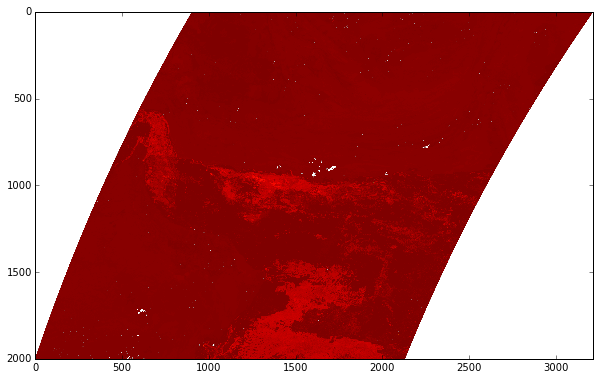

In [37]:
ds = gdal.Open("../tif/MODIS.LSWI.2002225.h23v06.tif")
array = ds.ReadAsArray()
array[array == -999] = np.nan
max_v = floor(array[~np.isnan(array)].max() / 10000)
min_v = floor(array[~np.isnan(array)].min() / 10000)
print max_v, min_v
plt.figure(figsize=(10, 10))
plt.imshow(array / 10000, vmin=min_v, vmax=0, cmap=plt.cm.jet)

[]

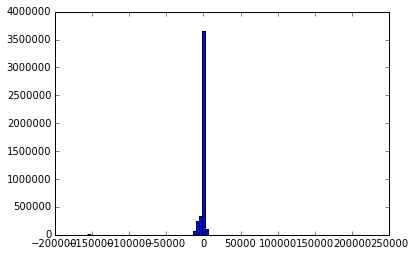

In [39]:
plt.hist(array[~np.isnan(array)], bins=100)
plt.plot()

In [13]:
print array[~np.isnan(array)].min()
print array[~np.isnan(array)].max()

-127581.0
104749.0


0.0 -7.0


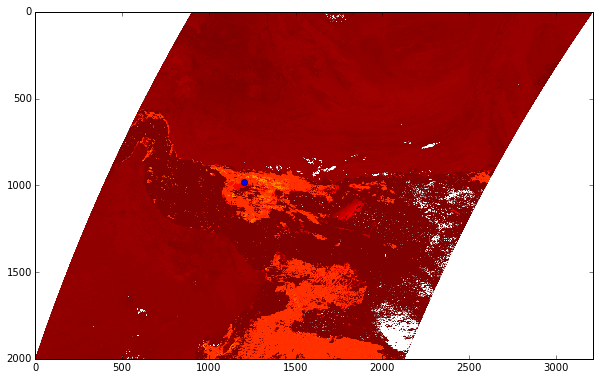

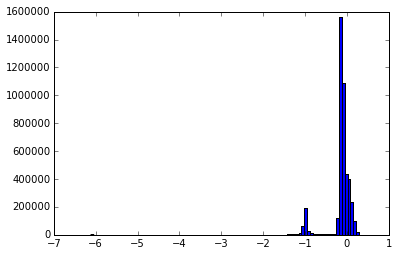

In [24]:
x = 1200
y = 980
ds = gdal.Open("/dias/users/kuwata.k.u-tokyo/Data/MODIS/LSWI/MOD09A1.A2002225.LSWI.tif")
array = ds.ReadAsArray()
array[array == -999] = np.nan
max_v = floor(array[~np.isnan(array)].max())
min_v = floor(array[~np.isnan(array)].min())
print max_v, min_v
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'bo')
plt.imshow(array, vmin=min_v, vmax=max_v, cmap=plt.cm.jet)
plt.show()
plt.hist(array[~np.isnan(array)], bins=100)
plt.plot()
plt.show()

In [4]:
files = sorted(glob("/dias/users/kuwata.k.u-tokyo/Data/MODIS/LSWI/*.tif"))
mimage = MultiImages(files)

In [5]:
AllArrays = mimage.AllArrays

In [20]:
print AllArrays.shape
print array.shape

(46, 6430000)
(2000, 3215)


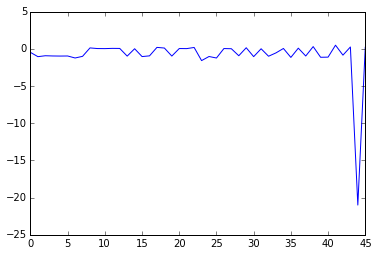

In [23]:
i = array.shape[1] * y + x
lswi = [AllArrays[j][i] for j in range(AllArrays.shape[0])]

plt.plot(range(AllArrays.shape[0]), lswi)